<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/MyProject/%20Health%20Care/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Failure Prediction**

Importing required liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

Reading Dataset 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/My project/Health/Heart Failure/heart.csv')

Checking Dataset information

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [5]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Spliting Dataset

In [9]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
Y = df['HeartDisease']

In [10]:
X = pd.get_dummies(X)

In [11]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [12]:
X.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.210240,0.789760,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.407701,0.407701,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
healthy = df[Y == 0]['Age'].values
ill = df[Y == 1]['Age'].values

Data Visualization

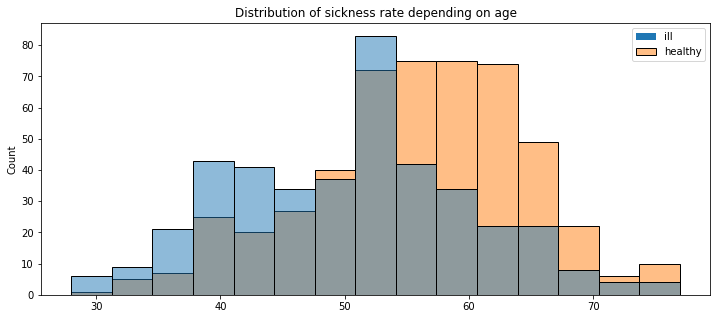

In [14]:
plt.figure(figsize = (12,5))
sns.histplot([healthy, ill], bins = 15)
plt.title('Distribution of sickness rate depending on age')
plt.legend(('ill', 'healthy'))

In [15]:
healthy = df[Y == 0]['Sex'].values
ill = df[Y == 1]['Sex'].values
print(f'Number of healthy men and women')
print(df[Y == 0]['Sex'].value_counts())
print('\n')
print(f'Number of ill men and women')
print(df[Y == 1]['Sex'].value_counts())

Number of healthy men and women
M    267
F    143
Name: Sex, dtype: int64


Number of ill men and women
M    458
F     50
Name: Sex, dtype: int64


Spliting data using train_test_split liabrary

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state= 20)

In [17]:
x_test1, x_test2, y_test1, y_test2 = train_test_split(x_test,y_test, test_size=.5, random_state=5) 

Model Training

In [18]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=20)

In [19]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=20)

In [20]:
print(model.score(x_train, y_train))
print(model.score(x_test1, y_test1))

0.8692098092643051
0.8260869565217391


In [21]:
y_pred1 = model.predict(x_test1)
y_pred1

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1])

In [22]:
print(classification_report(y_test1, y_pred1))
print('\n')
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.78      0.94      0.85        49

    accuracy                           0.83        92
   macro avg       0.84      0.82      0.82        92
weighted avg       0.84      0.83      0.82        92



              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.78      0.94      0.85        49

    accuracy                           0.83        92
   macro avg       0.84      0.82      0.82        92
weighted avg       0.84      0.83      0.82        92



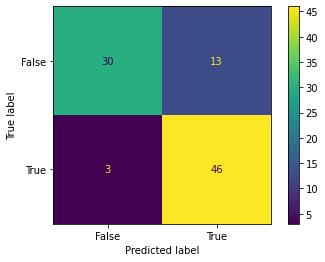

In [23]:
confusion_matrix1 = confusion_matrix(y_test1, y_pred1)
cm1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm1.plot()
plt.show()

In [24]:
model2 = RandomForestClassifier(max_depth = 7, min_samples_leaf=1, random_state=20)

In [25]:
model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, random_state=20)

In [26]:
print(model2.score(x_train, y_train))
print(model2.score(x_test2, y_test2))

0.9359673024523161
0.9021739130434783


In [27]:
y_pred2 = model2.predict(x_test2)
y_pred2

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1])

In [28]:
print(classification_report(y_test2, y_pred2))
print('\n')
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.89      0.94      0.91        50

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



              precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.89      0.94      0.91        50

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



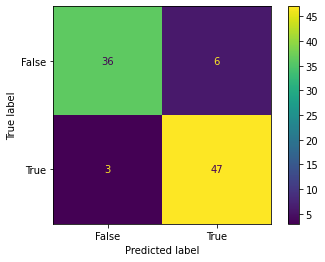

In [29]:
confusion_matrix2 = confusion_matrix(y_test2, y_pred2)
cm2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])
cm2.plot()
plt.show()

In [30]:
import pickle

In [31]:
pickle.dump(model2, open('Heart_RFC.sav', 'wb'))
pickle.dump(model, open('Heart_DTC.sav', 'wb'))